In [11]:
library(tidyverse)
library(tidymodels)
library(repr)
library(readxl)

$Title$

    Predicting Knowledge Level Using User Knowledge Data

$Intro$

Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal


	We are using data collected on subjects who both prepared for and took an exam. The subjects prepared for and took two exams: one on prerequisite material, and one on targeted material whose knowledge built upon the prerequisite material. 
    
    
Clearly state the question you will try to answer with your project
How high will somebody’s knowledge score be based on their study time, exam performance, and prerequisite knowledge? 
Identify and describe the dataset that will be used to answer the question


	We are using the User Knowledge Modeling Data Set. It includes columns for the degree of study time for both prerequisite knowledge and new knowledge bases, exam performances for both prerequisite knowledge and new knowledge bases, the degree of repetition, and the user’s knowledge level.
	All columns are recognized as type double except for the level of the user’s knowledge (which is a character variable). The data appears to be already normalized because all values (other than the user’s knowledge level) fit between values of 0 and 1. The data is very close to being tidy - other than a description of the data in an extra column, the literal data itself is tidy. 
    
    
Preliminary exploratory data analysis:
Demonstrate that the dataset can be read from the web into R 
Clean and wrangle your data into a tidy format
Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.
 
 
$Methods:$

Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?


	Load the tidyverse, tidymodels and readxl library.
    
	Initially, the file (which is an excel file) will be read using the read_excel() function in the library readxl.
    
	The file will be tidied by removing the columns with descriptions and blank values. 
    
	Then, all columns except for SCG (The degree of repetition number of users for goal object materials) will be selected using the select() function.
    
	Next, we will mutate the UNS (targeted_area_knowledge) column from a character variable to a factor variable to ensure it can be used to categorize points on a visualization using the mutate(column title, as_factor() ) argument.
    
	After that, we will rename the column names, since acronyms are not very descriptive. 
    
	Then, we will initially visualize the data using the ggplot() function with PEG (prereq_exam_performance) on the y-axis and LPR (targeted_exam_performance)
    
	To begin our classification, we’ll make our model with nearest_neighbours and choose our K.
    
	We need to create a recipe, specifying our predictors and scaling and centering our data.
    
	Then we’ll make a workflow, adding our model and recipe, and then fit our data inside.
    
	Finally, we will create our new observation and predict its category. 
    
    
Describe at least one way that you will visualize the results


	We will plot our new observation on a scatter plot comparing prerequisite and targeted exam performance and circle it. 


Expectedoutcomes and significance:


What do you expect to find?


	We expect to find that students with higher prerequisite knowledge and exam score will be classified as having a higher knowledge level.
    
    
What impact could such findings have?


	These findings could highlight the importance of having a solid foundation of basic knowledge prior to learning more complex materials, and describe how the amount of time studied influences one’s knowledge level. 
    
    
What future questions could this lead 


	What factors determine/influence exam performance?
    
    

Code below:


New names:
* `` -> ...7
* `` -> ...8



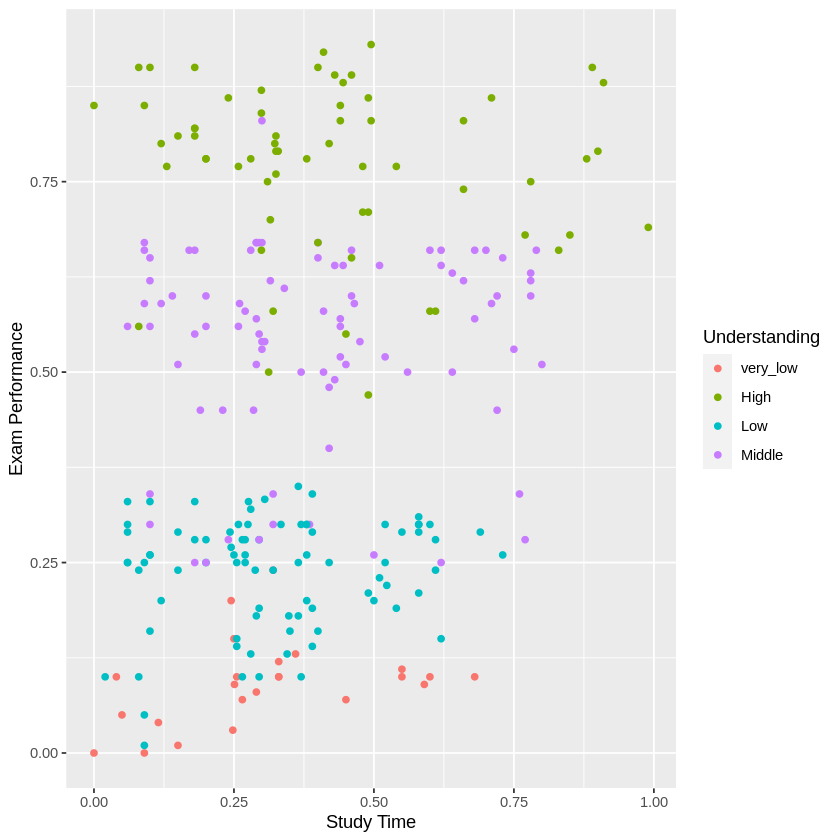

In [22]:
user_knowledge <- read_excel("data/Data_User_Modeling_Dataset_Hamdi Tolga KAHRAMAN.xls", sheet = 2) %>%
    select(STG:UNS) %>%
    mutate(UNS = as_factor(UNS))

user_knowledge_plot <- ggplot(user_knowledge, aes(x = STG, y = PEG, color = UNS)) + 
    geom_point() +
    labs(x = "Study Time", y = "Exam Performance", color = "Understanding")

user_knowledge_plot